## Seaborn Pair Ranking

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

train = pd.read_csv("data/train.csv", dtype={"Age": np.float64}, )
print(train.head(5))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                           Allen, Mr. William Henry    male   35      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
# Replacing missing ages with median
train["Age"] = train["Age"].fillna(train["Age"].median())
train["Age"] = train["Age"].fillna("None")
train["ParentsAndChildren"] = train["Parch"]
train["SiblingsAndSpouses"] = train["SibSp"]
 
train["Survived"][train["Survived"]==1] = "Survived"
train["Survived"][train["Survived"]==0] = "Died"

# Replace all the occurences of male with the number 0.
train.loc[train["Sex"] == "male", "Sex"] = 0
train.loc[train["Sex"] == "female", "Sex"] = 1
# Find all the unique values for "Embarked".

train["Embarked"] = train["Embarked"].fillna("S")
train.loc[train["Embarked"] == "S", "Embarked"] = 0
train.loc[train["Embarked"] == "C", "Embarked"] = 1
train.loc[train["Embarked"] == "Q", "Embarked"] = 2

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [4]:
#plt.figure()
data=train[["Fare","Survived","Age","ParentsAndChildren","SiblingsAndSpouses","Pclass","Embarked"]]
#sns.pairplot(data,hue="Survived", dropna=True)
#plt.savefig("1_seaborn_pair_plot.png")
data.tail()

,Fare,Survived,Age,ParentsAndChildren,SiblingsAndSpouses,Pclass,Embarked
886,13.00,Died,27,0,0,2,0
887,30.00,Survived,19,0,0,1,0
888,23.45,Died,28,2,1,3,0
889,30.00,Survived,26,0,0,1,1
890,7.75,Died,32,0,0,3,2


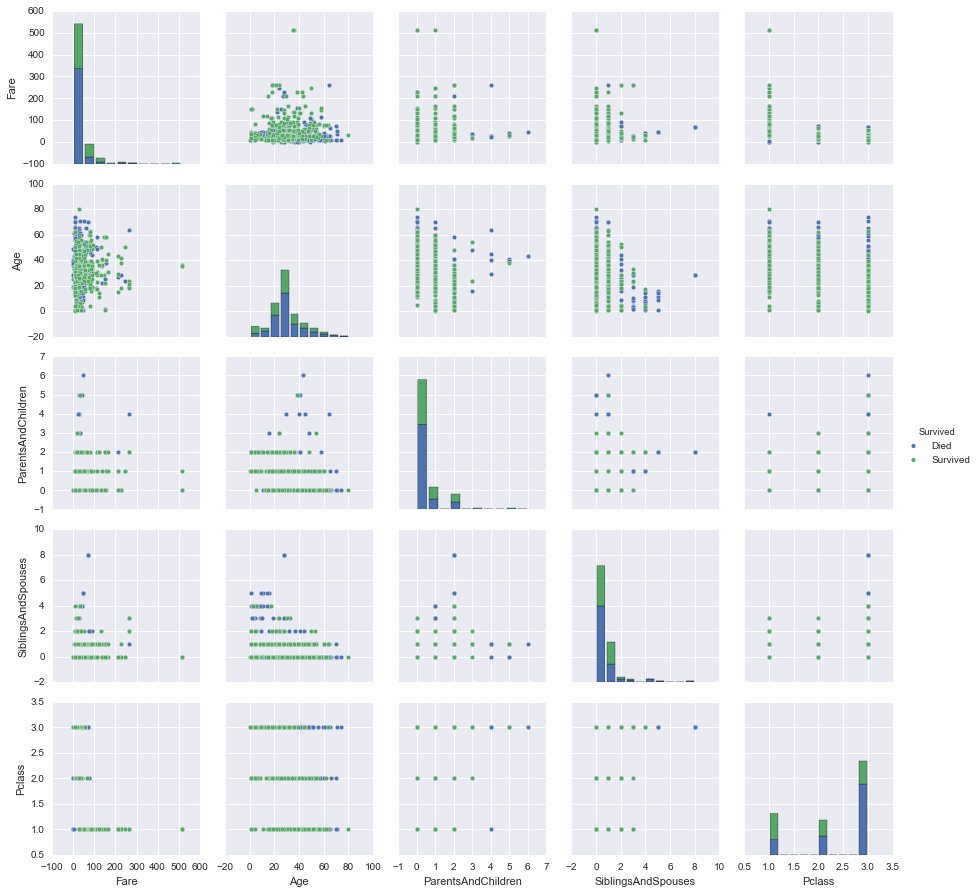

In [5]:
plt.figure()
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline
sns.pairplot(data=train[["Fare","Survived","Age","ParentsAndChildren","SiblingsAndSpouses","Pclass"]],
             hue="Survived", dropna=True)

